## 와인 데이터셋 불러오기

sklearn에서 와인 데이터셋을 로드하고 특성(X)과 타겟(y)을 DataFrame 및 Series로 변환하는 코드를 새 셀로 분리합니다.


In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# 와인 데이터셋 불러오기
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)

print("\n--- 1. 와인 데이터셋 불러오기 ---")
print(f"데이터셋의 특성(Feature) 개수: {X.shape[1]}")
print(f"데이터셋의 샘플(Sample) 개수: {X.shape[0]}")
print(f"타겟 클래스: {wine.target_names}\n")


--- 1. 와인 데이터셋 불러오기 ---
데이터셋의 특성(Feature) 개수: 13
데이터셋의 샘플(Sample) 개수: 178
타겟 클래스: ['class_0' 'class_1' 'class_2']



### EDA

데이터셋을 간단히 살펴봅시다.

In [2]:
# 1. 데이터 기술 통계량 확인
X.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  
count       178.000000  178.000000                    178.000000   178.000000  
mean          5.058090    0.957449                      2.611685   746.893258  
std           2.318286    0.228572                      0.709990   314.907474  
min           1.280000    0.480000                      1.270000   278.000000  
25%           3.220000    0.782500                      1.937500   500.500000  
50%           4.690000    0.965000                      2.780000   673.500000  
75%           6.200000    1.120000                      3.170000   985.000000  
max          13.000000    1.710000                      4.000000  1680.000000

In [3]:
# 2. 결측치 확인
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64


### 특성 간 관계 (Pairplot):



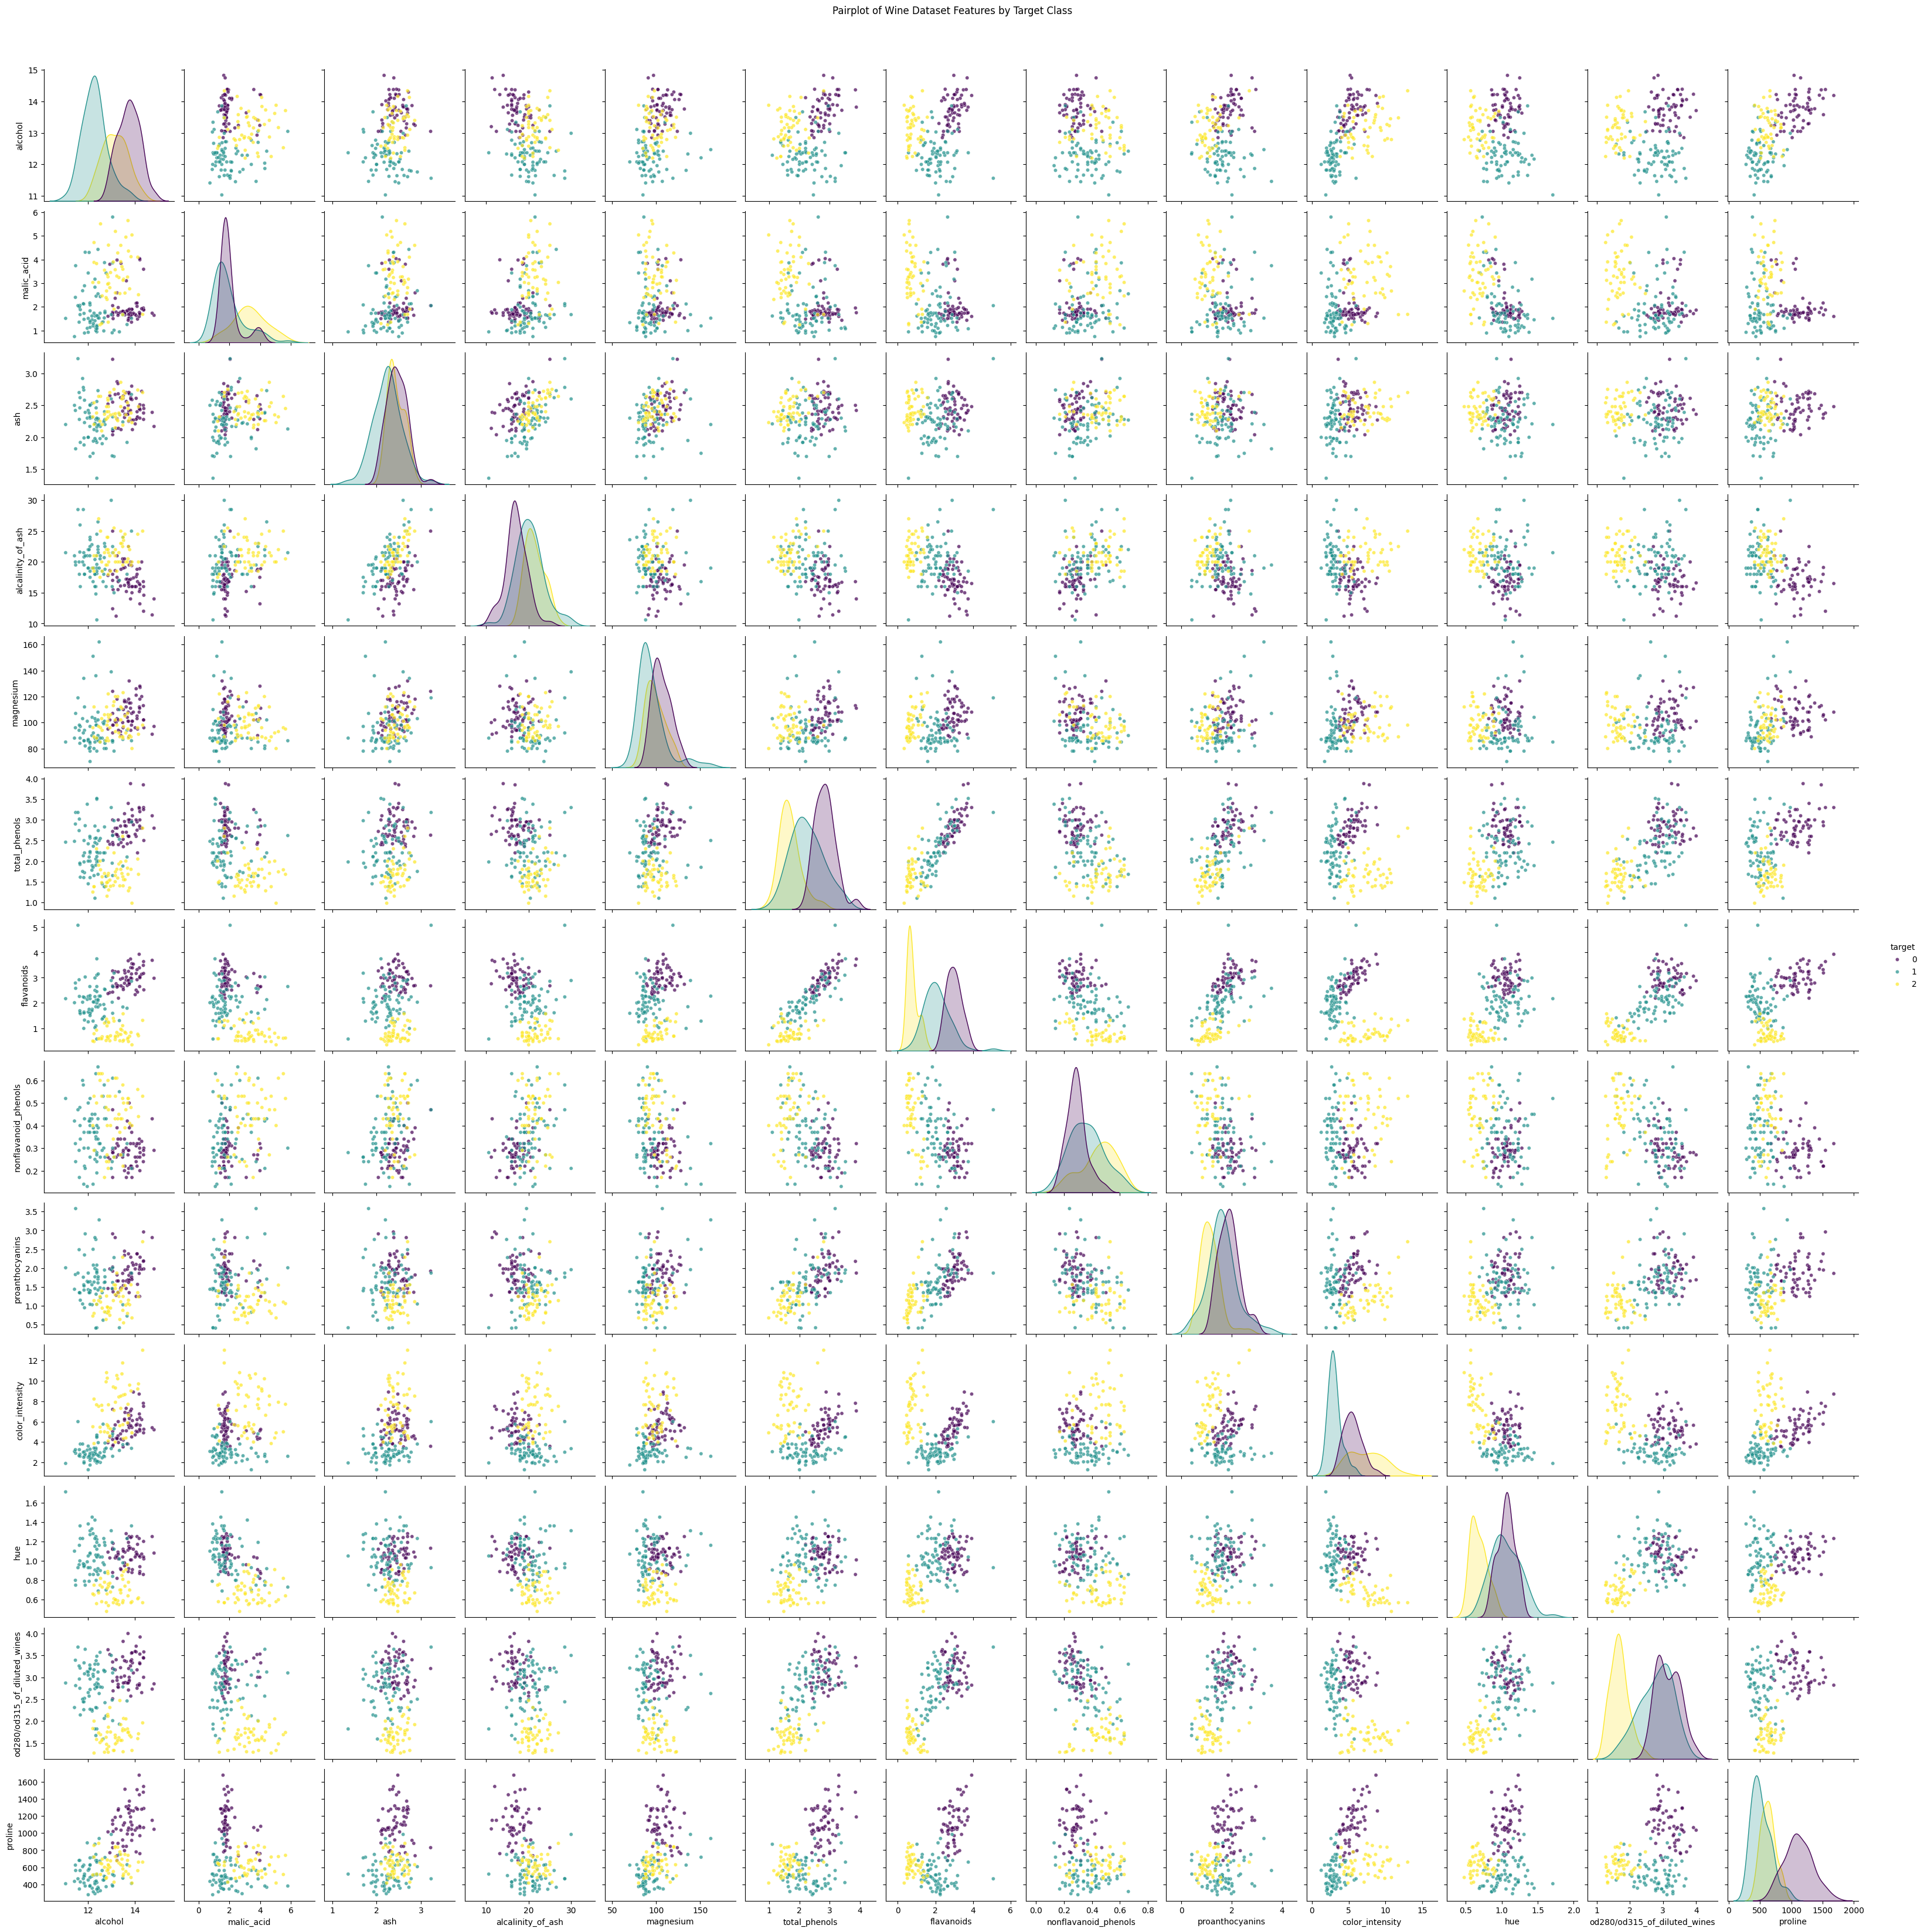

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot을 이용한 특성 간 관계 시각화
# 모든 특성에 대한 pairplot은 시간이 오래 걸리고 그래프가 복잡할 수 있으므로,
# 여기서는 처음 몇 개의 특성만 선택하여 시각화합니다. (또는 모든 특성을 사용해도 무방)
# 와인 데이터셋의 경우 13개 특성이므로 모든 특성으로 pairplot을 그리면 복잡할 수 있습니다.
# 시각화를 위해 target(y)을 DataFrame에 추가하여 색상(hue)으로 구분합니다.

df_eda = X.copy()
df_eda['target'] = y

print("\n### 특성 간 관계 (Pairplot):\n")
# 데이터셋이 크지 않으므로 전체 특성을 사용하여 pairplot을 생성합니다.
# hue='target'을 사용하여 각 클래스별로 색상을 구분합니다.
# 대각선(diag_kind)에는 히스토그램 대신 kde(커널 밀도 추정)를 사용하여 분포를 확인합니다.
# plot_kws를 사용하여 점의 크기와 투명도를 조절하여 가독성을 높입니다.

sns.pairplot(df_eda, hue='target', diag_kind='kde', palette='viridis', plot_kws={'s':20, 'alpha':0.7})
plt.suptitle('Pairplot of Wine Dataset Features by Target Class', y=1.02) # y를 조절하여 제목 위치 조정
plt.show()

## 데이터셋 분할

로드된 데이터셋을 훈련 세트와 테스트 세트로 분할하는 코드를 새 셀로 분리합니다.


In [5]:
from sklearn.model_selection import train_test_split

# 2. 데이터셋 분할 (훈련 세트와 테스트 세트)
# 모델 학습을 위한 훈련 세트와 성능 평가를 위한 테스트 세트로 데이터를 나눕니다.
# test_size=0.2는 전체 데이터의 20%를 테스트 세트로 사용하겠다는 의미입니다.
# random_state는 재현 가능한 결과를 위해 설정합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n--- 2. 데이터셋 분할 ---")
print(f"훈련 세트 크기: {len(X_train)}개 샘플")
print(f"테스트 세트 크기: {len(X_test)}개 샘플\n")


--- 2. 데이터셋 분할 ---
훈련 세트 크기: 142개 샘플
테스트 세트 크기: 36개 샘플



## 모델 학습
Random Forest 모델을 불러와서 학습을 진행합니다.

In [6]:
from sklearn.ensemble import RandomForestClassifier

# 3. Random Forest 모델 학습
# RandomForestClassifier 모델을 초기화하고 훈련 데이터를 사용하여 학습시킵니다.
# n_estimators는 트리의 개수를 의미하며, random_state는 재현 가능성을 위해 설정합니다.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("\n--- 3. Random Forest 모델 학습 ---")
print("Random Forest 모델 학습 완료!\n")


--- 3. Random Forest 모델 학습 ---
Random Forest 모델 학습 완료!



## 모델 정확도 확인

학습된 Random Forest 모델의 예측 정확도를 계산하고 출력하는 코드를 새 셀로 분리합니다.

In [7]:
from sklearn.metrics import accuracy_score

# 4. 모델 정확도 확인
# 학습된 모델을 사용하여 테스트 세트의 예측값을 얻고, 실제 값과 비교하여 정확도를 계산합니다.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- 4. 모델 정확도 확인 ---")
print(f"모델의 정확도: {accuracy:.4f}\n")


--- 4. 모델 정확도 확인 ---
모델의 정확도: 1.0000



## 새로운 데이터 예측

학습된 Random Forest 모델을 사용하여 새로운 데이터에 대한 예측을 수행하고 결과를 출력하는 코드를 새 셀로 분리합니다.

### Instructions:
1. `X_test`에서 첫 번째 샘플을 선택하여 `sample_data`로 정의합니다. 이 샘플은 새로운 데이터라고 가정합니다.
2. `sample_data`에 대해 모델의 `predict` 메서드를 사용하여 클래스를 예측합니다.
3. 예측된 클래스 인덱스와 해당 클래스 이름을 출력하고, 실제 클래스 이름과 비교하여 보여줍니다.

In [8]:
import pandas as pd

# 5. 새로운 데이터 예측 (예시)
# 실제 데이터는 아니지만, 테스트 세트의 첫 번째 샘플을 '새로운 데이터'라고 가정하고 예측해봅니다.
# .iloc[0]을 사용하여 첫 번째 샘플을 선택하고, .to_frame().T를 사용하여 2D 배열 형태로 변환합니다.
sample_data = X_test.iloc[[0]]
predicted_class_index = model.predict(sample_data)[0]
predicted_class_name = wine.target_names[predicted_class_index]

print("\n--- 5. 새로운 데이터 예측 (예시) ---")
print("테스트 세트의 첫 번째 샘플에 대한 예측:")
print(f"예측된 와인 클래스 (인덱스): {predicted_class_index}")
print(f"예측된 와인 클래스 (이름): {predicted_class_name}")
print(f"실제 와인 클래스 (이름): {wine.target_names[y_test.iloc[0]]}")


--- 5. 새로운 데이터 예측 (예시) ---
테스트 세트의 첫 번째 샘플에 대한 예측:
예측된 와인 클래스 (인덱스): 0
예측된 와인 클래스 (이름): class_0
실제 와인 클래스 (이름): class_0


## Confusion Matrix 시각화

Confusion Matrix를 통해 모델의 정확도를 살펴봅니다.


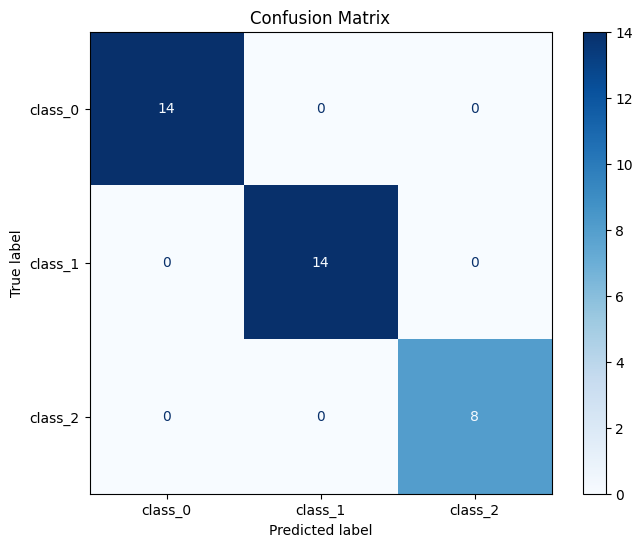

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix 시각화
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix')
plt.show()

## Feature Importance 차트 시각화

기존의 특성 중요도 추출 및 시각화 코드를 새 셀로 분리합니다.


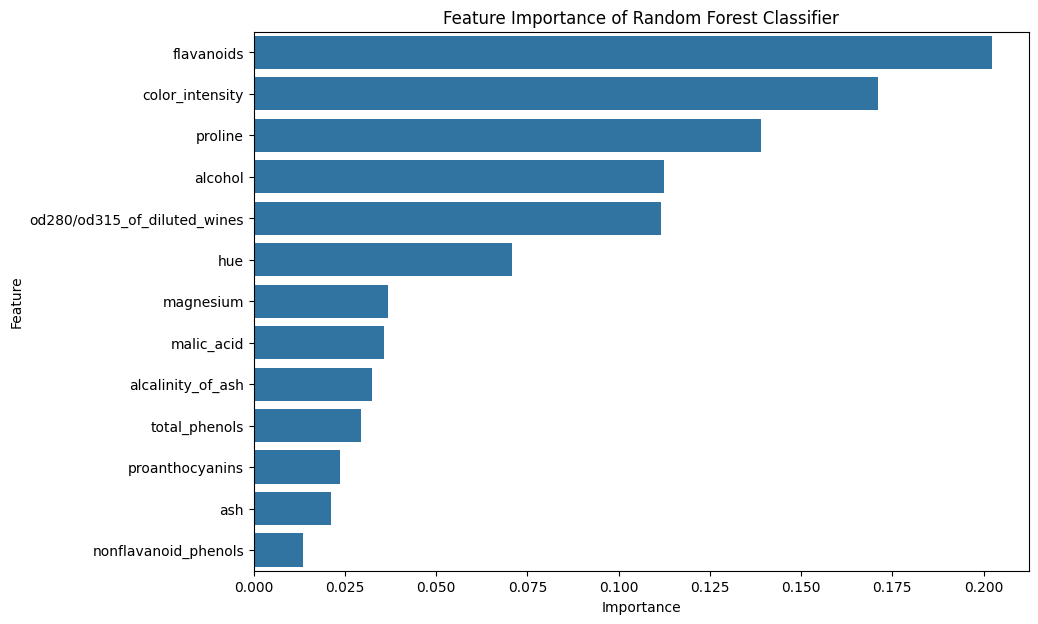

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 특성 중요도 추출
feature_importances = model.feature_importances_

# 특성 이름과 중요도 매핑
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 중요도 기준으로 정렬
features_df = features_df.sort_values(by='Importance', ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance of Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Shapley Value를 이용한 모델 예측 설명

Shapley Value는 각 특성이 모델의 예측에 기여하는 정도를 공정하게 분배하여 설명하는 방법입니다. 이를 통해 모델이 특정 예측을 내린 이유를 더 깊이 이해할 수 있습니다.


--- 8. Shapley Value 분석 ---
선택된 샘플의 실제 클래스: class_0
모델의 예측 클래스: class_0

예측된 클래스 (class_0)에 대한 Shapley Values 시각화:



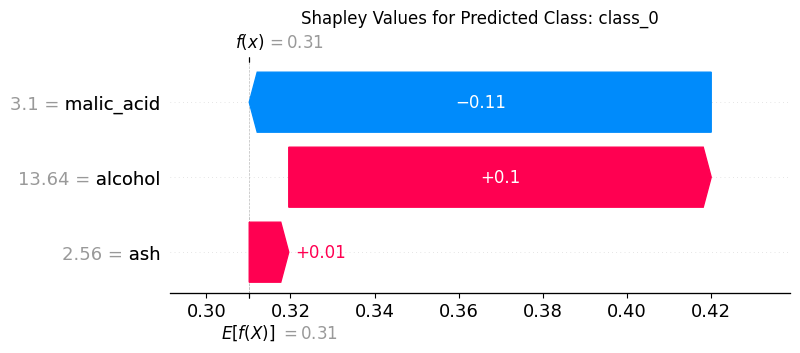


--- Shapley Values에 대한 추가 설명 ---
빨간색은 해당 특성이 예측된 클래스 확률을 높이는 데 기여했음을 의미합니다.
파란색은 해당 특성이 예측된 클래스 확률을 낮추는 데 기여했음을 의미합니다.
각 막대의 길이는 기여도(Shapley Value)의 크기를 나타냅니다.


In [11]:
import shap
import matplotlib.pyplot as plt

# TreeExplainer를 사용하여 모델 설명자 생성
# Random Forest와 같은 트리 기반 모델에 적합합니다.
explainer = shap.TreeExplainer(model)

# 예측을 설명할 샘플 데이터 선택 (예: 테스트 세트의 첫 번째 샘플)
sample_to_explain = X_test.iloc[[0]]

# 선택된 샘플에 대한 Shapley 값 계산
shap_values = explainer.shap_values(sample_to_explain)

print("\n--- 8. Shapley Value 분석 ---")
print(f"선택된 샘플의 실제 클래스: {wine.target_names[y_test.iloc[0]]}")
print(f"모델의 예측 클래스: {wine.target_names[model.predict(sample_to_explain)[0]]}\n")

# 클래스 0, 1, 2에 대한 Shapley 값을 출력 (다중 클래스 분류의 경우)
# shap_values는 각 클래스에 대한 리스트를 반환합니다.
# 여기서는 예측된 클래스에 대한 설명을 주로 보여줄 것입니다.
predicted_class_index = model.predict(sample_to_explain)[0]

print(f"예측된 클래스 ({wine.target_names[predicted_class_index]})에 대한 Shapley Values 시각화:\n")

# 새로운 Figure를 명시적으로 생성하고, shap.waterfall_plot이 내부적으로 show()를 호출하지 않도록 show=False로 설정합니다.
fig = plt.figure(figsize=(10, 6))
shap.waterfall_plot(shap.Explanation(values=shap_values[predicted_class_index][0],
                                    base_values=explainer.expected_value[predicted_class_index],
                                    data=sample_to_explain.iloc[0],
                                    feature_names=X.columns.tolist()), show=False)
plt.title(f"Shapley Values for Predicted Class: {wine.target_names[predicted_class_index]}")

# 현재 Figure를 표시하고 닫아서 불필요한 텍스트 출력을 방지합니다.
plt.show()
plt.close(fig) # Figure 객체를 명시적으로 닫아줍니다.

print("\n--- Shapley Values에 대한 추가 설명 ---")
print("빨간색은 해당 특성이 예측된 클래스 확률을 높이는 데 기여했음을 의미합니다.")
print("파란색은 해당 특성이 예측된 클래스 확률을 낮추는 데 기여했음을 의미합니다.")
print("각 막대의 길이는 기여도(Shapley Value)의 크기를 나타냅니다.")

### 하이퍼파라미터 튜닝: `max_depth`에 따른 훈련/테스트 정확도 변화 시각화

모델의 복잡도를 조절하는 중요한 하이퍼파라미터 중 하나인 `max_depth`(트리의 최대 깊이)에 따라 Random Forest 모델의 훈련 세트 정확도와 테스트 세트 정확도가 어떻게 변하는지 살펴봅니다. 이는 모델이 과적합(Overfitting)되거나 과소적합(Underfitting)되는 경향을 파악하는 데 도움을 줍니다.

--- `max_depth`에 따른 정확도 계산 시작 ---
Max Depth: 1 , Train Accuracy: 0.9859, Test Accuracy: 0.9167
Max Depth: 2 , Train Accuracy: 0.9859, Test Accuracy: 0.9722
Max Depth: 3 , Train Accuracy: 0.9930, Test Accuracy: 1.0000
Max Depth: 4 , Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 5 , Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 6 , Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 7 , Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 8 , Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 9 , Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 10, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 11, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 12, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 13, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 14, Train Accuracy: 1.0000, Test Accuracy: 1.0000
Max Depth: 15, Train Accuracy: 1.0000, Test Accuracy: 1.0000
--- `max_depth`에 따른 정확도 계산 완료 ---


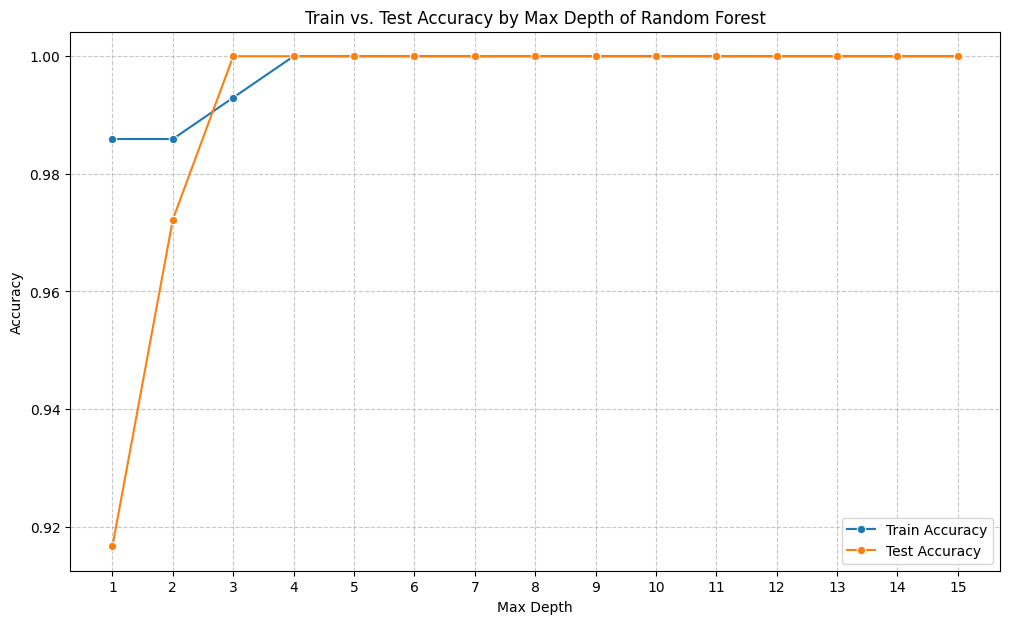

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 테스트할 max_depth 범위 설정
depths = range(1, 16) # 최대 깊이 1부터 15까지 테스트

# 각 depth에 따른 훈련 및 테스트 정확도를 저장할 리스트
train_accuracies = []
test_accuracies = []

print("--- `max_depth`에 따른 정확도 계산 시작 ---")
for depth in depths:
    # max_depth를 설정하여 모델 초기화 및 학습
    model_depth = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    model_depth.fit(X_train, y_train)

    # 훈련 세트 정확도 계산
    y_train_pred = model_depth.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_acc)

    # 테스트 세트 정확도 계산
    y_test_pred = model_depth.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_acc)

    print(f"Max Depth: {depth:<2}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

print("--- `max_depth`에 따른 정확도 계산 완료 ---")

# 정확도 그래프 시각화
plt.figure(figsize=(12, 7))
sns.lineplot(x=list(depths), y=train_accuracies, marker='o', label='Train Accuracy')
sns.lineplot(x=list(depths), y=test_accuracies, marker='o', label='Test Accuracy')

plt.title('Train vs. Test Accuracy by Max Depth of Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(list(depths))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()